# Project - Probability: Mobile Application for Lottery Addiction

**Background and Aim**: We have been hired by a medical institute which treats lottery addiction to create the logical core of the app they are building to help lottery addicts better estimate their chances of winning, and thus avoid making untenable financial commitments where odds are not worth it. We have to examine ["Lotto 6/49"](https://en.wikipedia.org/wiki/Lotto_6/49), Canada's national lottery, and calculate probabilities.

We will be focused on building functions in order to answer questions like:

- What is the probability of winning the big prize with a single ticket?
- What is the probability of winning the big prize if we play 40 different tickets (or any other number)?
- What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

**Dataset**: We are also required to consider historical data coming from the national [6/49 lottery game](https://en.wikipedia.org/wiki/Lotto_6/49) in Canada. The [data set](https://www.kaggle.com/datascienceai/lottery-dataset) available on kaggle, has data for 3,665 drawings, dating from 1982 to 2018.

**Data Analysis Strategy**: 
- We will write a package (or library) of core functions to automate the tasks involved in analysis. These functions will include simple basic functions such as ones which calculate factorials to more complicated nested functions which calculate probabilities for various scenarios.
- We will also analyze historical data of winning combinations in order to provide the users of the app with a broader perspective of the odds they have for winning the big prize in lottery.

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

### Create a library of probability functions

The series of different probability functions are written as a library which can be used for various probability calculations.

In [2]:
# Event Probability Function

def event_probability(n, s=1):
    """ Calculates the probability of an event
    Args:
    n(int): total number of possible outcomes
    s(int): number of successful outcomes, default: 1
    Returns:
    float: empirical and/ or theoretical probability of an event
    """
    probability = s/ n
    return probability

In [3]:
# Complement of probability Function

def non_probability(n, s=1): # p_e is probability of event
    """ Calculates the non-probability or complement probability of an event
    Args:
    n(int): total number of possible outcomes
    s(int): number of successful outcomes, default: 1
    Returns:
    float: empirical and/ or theoretical probability of an event
    """
    probability = s/ n
    non_probability = 1 - probability
    return non_probability

In [4]:
# Intersection Function for events with similar outcomes (repetitive events)
def intersection_similar(n, s=1, e=2):
    """ Nested function: calculates the probability of events (1 and 2 and 3 and...e) with similar outcomes 
        happening together or in a row
    Args:
    n(int): total number of possible outcomes
    s(int): number of successful outcomes, default: 1
    e(int): number of events happening together or in a row (e.g. 6 coins tossed together or 1 coin tossed six times)
    Returns:
    float: empirical and/ or theoretical probability of an event
    """
    def event_probability(n, s):
        probability = s/ n
        return probability
   
    intersection_similar = event_probability(n, s) ** e
    return intersection_similar        
    

In [5]:
# Intersection Function for two events with dissimlar outcomes
def intersection_dissimilar(n, s2, s1=1):
    """ Nested function: Calculates the probability of two events (1 and 2) with dissimilar outcomes 
        happening together or in a row (multiplies the probabilities)
    Args:
    n(int): total number of possible outcomes
    s1(int): number of successful outcomes for event 1, default: 1
    s2(int): number of successful outcomes for event 2 
    Returns:
    float: empirical and/ or theoretical probability of an event
    """
    def event_probability_1(n, s1):
        probability_1 = s1/ n
        return probability_1
    
    def event_probability_2(n, s2):
        probability_2 = s2/ n
        return probability_2
    
   
    intersection_dissimilar = event_probability_1(n, s1) * event_probability_2(n, s2)
    return intersection_dissimilar

In [6]:
# Union Function for two mutually exclusive events

def union_me(n, s2, s1=1):
    """ Nested function: Calculates the probability of two events (1 and 2) with similar or dissimilar outcomes 
        with either or both events happening together or in a row (adds the probabilities)
    Args:
    n(int): total number of possible outcomes
    s1(int): number of successful outcomes for event 1, default: 1
    s2(int): number of successful outcomes for event 2 
    Returns:
    float: empirical and/ or theoretical probability of an event
    """
    def event_probability_1(n, s1):
        probability_1 = s1/ n
        return probability_1
    
    def event_probability_2(n, s2):
        probability_2 = s2/ n
        return probability_2
    
   
    union_me = event_probability_1(n, s1) + event_probability_2(n, s2)
    return union_me

In [7]:
# Permutation with replacement function for sampling with replacement
def permutation_with_repl(n, k):
        """ Calculates number of possible permutations for samples with replacement
        Args: 
        n(int): population size
        k(int): sample size 
        Returns: Number of possible outcomes (permutations) for k items drawn from n items with replacement """
       
        permutation = n**k
        return permutation

In [8]:
# Probability function for a sample drawn with replacement

def probability_with_repl(n, k, s=1):
    """ Nested function: Calculates probability for drawing samples with replacement
        Args: 
        s(int): number of successful outcomes; default = 1
        n(int): population size
        k(int): sample size
        Returns: 
        Probability for drawing a sample of size k from population of size n with s successful outcomes """
    
    
    def permutation(n, k):
        """ Calculates number of possible permutations for samples with replacement
        Args: 
        n: population size
        k: sample size 
        Returns: 
        Number of possible outcomes (permutations) for k items drawn from n items with replacement """
       
        permutation = n**k
        return permutation
    
    probability = s/ permutation(n, k)
    return probability

In [9]:
# Factorial function
def factorial(n):
    """ Calculates factorial of an integer n"""
    factorial = 1
    for i in range(1, n+1, 1):
        factorial = (factorial) * (i)
    return factorial

In [10]:
# Permutation function for all samples without replacement 
def permutation_total(n):
    """ Calculates total possible permutations for drawing samples without replacement 
        from a population of size n.
        Same as factorial()
        """
    permutation = 1
    for i in range(1, n+1, 1):
        permutation = (permutation) * (i)
    return factorial

In [11]:
# Permutation function for drawing k items from n items without replacement

def permutation_wo_repl(n, k):
    """ Calculates number of possible permutations for samples of size k without replacement from a populatio of size n
    Args: 
    n = total number of items
    k = number of items drawn from n 
    Returns: Number of possible outcomes (permutations) for k items drawn from n items without replacement """
    
    permutation = n
    for i in range(1, k, 1):
        permutation = permutation * (n - i)
    return permutation

In [12]:
# Permutation function for drawing k items from n items without replacement

def permutation(n, k):
    """ Nested function: Calculates number of possible permutations for samples of size k without replacement 
        from a populatio of size n.
        Same as permutation_wo_repl ()
    Args: 
    n = total number of items
    k = number of items drawn from n 
    Returns: Number of possible outcomes (permutations) for k items drawn from n items without replacement """
    def factorial(n):
        factorial = 1
        for i in range(1, n+1, 1):
            factorial = (factorial) * (i)
        return factorial
   
    permutation = factorial(n) / factorial(n-k)
    return permutation

In [13]:
# Probability function for drawing samples without replacement
def probability_wo_repl(n, k, s=1):
    """ Nested function: Calculates probability for drawing a sample without replacement
        Args: 
        s(int): number of successful outcomes; default = 1
        n(int): population size
        k(int): sample size
        Returns: Probability for drawing a sample of size k from population of size n with s successful outcomes """
    
    
    def permutation(n, k):
        """ Calculates number of possible permutations for samples without replacement
        Args: 
        n = total number of items
        k = number of items drawn from n 
        Returns: Number of possible outcomes (permutations) for k items drawn from n items without replacement """
       
        def factorial(n):
            """ calclulate factorial for an integer n"""
            factorial = 1
            for i in range(1, n+1, 1):
                factorial = (factorial) * (i)
            return factorial
   
        permutation = factorial(n) / factorial(n-k)
        return permutation
    
    probability = s/ permutation(n, k)
    return probability

In [14]:
# Unique arrangements function
def unique_arng(n, k):
    """ Nested function: Determines the number of unique arrangements for a random sample drawn 
        from a population without replacement.
        Same as combinations()
    Args: 
        n(int): size of populations
        k(int): size of sample 
        Returns: 
        Number of possible unique arrangements for k items drawn from n items without replacement """
    
    def permutation(n, k):
        """ Calculates number of possible permutations for samples without replacement
        Args: 
        n = total number of items
        k = number of items drawn from n 
        Returns: Number of possible outcomes (permutations) for k items drawn from n items without replacement """
       
        def factorial(n):
            """ calclulate factorial for an integer n"""
            factorial = 1
            for i in range(1, n+1, 1):
                factorial = (factorial) * (i)
            return factorial
   
        permutation = factorial(n) / factorial(n-k)
        return permutation
    
    C = permutation (n,k) / factorial(k)
    return C   

In [15]:
# Combinations function to determine number of possible combinations
def combinations(n, k):
    """ Nested function: Determines the number of unique arrangements (combinations) for a random sample drawn from a population 
    without replacement.
    Same as unique_arng()
    Args: 
        n(int): size of populations
        k(int): size of sample 
        Returns: Number of possible unique arrangements for k items drawn from n items without replacement 
        """
    
        
    def factorial(n):
        """ calclulate factorial for an integer n"""
        factorial = 1
        for i in range(1, n+1, 1):
            factorial = (factorial) * (i)
        return factorial
   
            
    C = factorial (n) / (factorial(k) * factorial(n-k))
    return C   

In [16]:
# Probability function for calculating probability of drawing combinations
def probability_combinations(n, k, s=1):    
    """ Nested function: Determines the probability of combinations (unique arrangements for a random sample 
        drawn from a population without replacement
        Args: 
        n(int): size of populations
        k(int): size of sample 
        s(int): Number of successful outcomes; default = 1
        Returns: 
        probability unique arrangements for k items drawn from n items without replacement """
    def unique_arng(n, k):
        """ Determines the number of unique arrangements for a random sample drawn from a population without replacement
        Args: 
        n = size of populations
        k = size of sample 
        Returns: Number of possible unique arrangements for k items drawn from n items without replacement """

        def permutation(n, k):
            """ Calculates number of possible permutations for samples without replacement
            Args: 
            n = total number of items
            k = number of items drawn from n 
            Returns: Number of possible outcomes (permutations) for k items drawn from n items without replacement """

            def factorial(n):
                """ calclulate factorial for an integer n"""
                factorial = 1
                for i in range(1, n+1, 1):
                    factorial = (factorial) * (i)
                return factorial

            permutation = factorial(n) / factorial(n-k)
            return permutation

        C = permutation (n,k) / factorial(k)
        return C   
    
    probability = s / unique_arng(n, k)
    return probability


### Loto 6/ 49 Format - Probability of Winning "Big Prize" on a Single Ticket

We have written the probability functions library above which contains all the possible functions which will be needed for analysis. We will now focus on the format of **Loto 6/ 49** format.

As the name suggests, each ticket is printed with 6 numbers drawn without replacement from a population of 49 numbers. On the face of it, it suggests that the odds for winning are fairly high. Below we carry out an analysis on the basis of number of possible combinations and odds of winning on a single ticket.

From the library of probability functions, we will use the functions `combinations()` to determine the number of possible combinations, and `probability_combinations()` to determine the probability of winning big prize. The population size n=49 and sample size k=6.

After that, we will write a function `one_ticket_probability()` which presents the information in a user friendly way for the proposed app being developed.

In [17]:
# Determine number of possible combinations and probability of winning on a single ticket

loto_combinations = combinations(n=49, k=6)
loto_probability = probability_combinations(n=49, k=6)
print('loto_combinations: ', loto_combinations, '\n', 'loto_probability: ', loto_probability)

loto_combinations:  13983816.0 
 loto_probability:  7.151123842018516e-08


In [18]:
### Write a user friendly function for presentation of information

def one_ticket_probability(total_numbers = 6, total_tickets = 1):
    """ Presents probabiity of winning on one ticket from Loto 6/49 in a user-friendly format
    Args:
    total_numbers(int): total of numbers on the ticket, default = 6
    total_tickets(int): total number of tickets
    """
    
    return (" Your probability of winning with 6 numbers combination in Loto 6/49 is approximately 0.00000000{a} or approximately one in {b} million".format(a = str(loto_probability)[0:1], b = round(loto_combinations/1000000)))
print(one_ticket_probability())    

 Your probability of winning with 6 numbers combination in Loto 6/49 is approximately 0.000000007 or approximately one in 14 million


### Nested Function for Multiple Tickets

Above was just a demonstration of the concept or the prototype. 
In fact, we need to write a complete nested function for anyone to be able to check their odds of winning in a lottery with any number of tickets and any number of numbers on the ticket.

For this, we will modify the functions `combinations()` and `probability_combinations()` functions, and write one nested function which takes as input the lottery format i.e. size of population (n) or total number from which ticket combinations are drawn, size of ticket combinations(k), number of tickets (s, i.e. the number of combinations being checked or number of successful combinations). We will set the default of these parameters to the defaults of Loto 6/49, and if the users want to change it to some other lottery they will just have to pass the required arguments. We will name this function `probability_lottery()`.   

In [19]:
# Nested function to calculate probability for any lottery system of Loto 6/49 type and present information to the user

def probability_lottery(n = 49, k = 6, s=1):
    """ Nested function:  
        For lottery systems determines the probability of winning big_prize on any number of tickets.
        Args: 
        n(int): size of set of numbers from which ticket combinations are drawn; default = 49
        k(int): size of number combinations on tickets; default = 6 
        s(int): number of tickets; default = 1
        Returns: 
        probability of winning big_prize with s number of tickets"""

    def probability_combinations(n, k, s):    
        """ Nested function: Determines the probability of combinations (unique arrangements for a random sample 
            drawn from a population without replacement. 
            Args: 
            n(int): size of population 
            k(int): size of sample  
            s(int): Number of successful outcomes 
            Returns: 
            probability of unique arrangements(combinations) for k items drawn from n items without replacement
            """
    
        def unique_arng(n, k):
            """ Determines the number of unique arrangements for a random sample drawn from a population without replacement
            Args: 
            n(int): size of population
            k(int): size of sample 
            Returns: 
            Number of possible unique arrangements for k items drawn from n items without replacement
            """

            def permutation(n, k):
                """ Calculates number of possible permutations for samples without replacement
                Args: 
                n(int): total number of items
                k(int): number of items drawn from n 
                Returns: Number of possible outcomes (permutations) for k items drawn from n items without replacement """

                def factorial(n):
                    """ calclulate factorial for an integer n"""
                    factorial = 1
                    for i in range(1, n+1, 1):
                        factorial = (factorial) * (i)
                    return factorial

                permutation = factorial(n) / factorial(n-k)
                return permutation

            C = permutation (n,k) / factorial(k)
            return C   
    
        probability = s / unique_arng(n, k)
        return probability
    
    return (" Your probability of winning with {} ticket(s) of {} numbers combination in Loto 6/49 is approximately {a:.7f} % or approximately one in {b:.1f} million"
            .format(s, k, a = probability_combinations(n, k, s) *100, b = (1/probability_combinations(n, k, s))/1000000))
 

#### Function Testing
We have to test the function for various values including certain and impossible events

In [20]:
# Test above function for one ticket
print(probability_lottery()) # does not require arguments for default Loto 6/49 lottery and one ticket

 Your probability of winning with 1 ticket(s) of 6 numbers combination in Loto 6/49 is approximately 0.0000072 % or approximately one in 14.0 million


In [21]:
# Test above function for two tickets for Loto 6/49
print(probability_lottery(s=2))

 Your probability of winning with 2 ticket(s) of 6 numbers combination in Loto 6/49 is approximately 0.0000143 % or approximately one in 7.0 million


In [22]:
# Test above function for three tickets for Loto 6/49
print(probability_lottery(s=3))

 Your probability of winning with 3 ticket(s) of 6 numbers combination in Loto 6/49 is approximately 0.0000215 % or approximately one in 4.7 million


In [23]:
# Test above function for half the possible tickets for Loto 6/49, check point: 50% probability, should equate to 0.5
print(probability_lottery(s=6991908))

 Your probability of winning with 6991908 ticket(s) of 6 numbers combination in Loto 6/49 is approximately 50.0000000 % or approximately one in 0.0 million


In [24]:
# Test above function for all possible tickets for Loto 6/49: check point: 100% probability, should equate to 1
print(probability_lottery(s=13983816))

 Your probability of winning with 13983816 ticket(s) of 6 numbers combination in Loto 6/49 is approximately 100.0000000 % or approximately one in 0.0 million


### Plotting number of tickets versus probability
The function has passed all the tests.
Below, the probabilities are plotted against the number of tickets to demonstrate the direct relationship between big prize and the number of tickets.
Remember we are analyzing approximately 14 million ticket combinations.
The blue horizontal line indicates the chances of someone having 1,000,000 (one million) tickets (not a likely event but only to demonstrate how slim are the chances of winning big prize). 

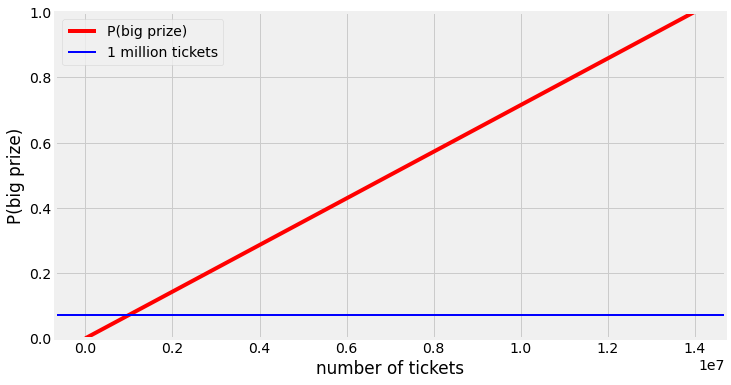

In [25]:
probabilities = []

for i in range(1, int(combinations(n=49, k=6))+1):
    probability = probability_combinations(n=49, k=6, s=i)
    probabilities.append(probability)
    
fig = plt.figure(figsize=(12, 6))  
plt.style.use('fivethirtyeight')

plt.plot(probabilities, color = 'red', label = 'P(big prize)')
plt.ylim (0, 1)
plt.xlabel('number of tickets')
plt.ylabel('P(big prize)')
plt.axhline(y = probability_combinations(n=49, k=6, s=1000000), color = 'blue', linewidth = 2, label = '1 million tickets')
plt.legend()
plt.show() 

### Analysis of Historical Data

Lotto 6/49 is one of three national lottery games in Canada. Launched on June 12, 1982, Lotto 6/49 was the first nationwide Canadian lottery game to allow players to choose their own numbers. Previous national games, such as the Olympic Lottery, Loto Canada and Superloto used pre-printed numbers on tickets. Lotto 6/49 led to the gradual phase-out of that type of lottery game in Canada.
The dataset consists of the file `649.csv` derived from [kaggle](https://www.kaggle.com/datascienceai/lottery-dataset) and contains historical data from June 1982 onwards till 2018.

Our purpose is to enable the users to compare their ticket combinations with past winning combinations in order to enable them to see whether they would ever have won. 

First, we will explore the dataset in order to understand the data structure.

In [26]:
# Data exploration
loto = pd.read_csv('649.csv')
print(loto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCT          3665 non-null   int64 
 1   DRAW NUMBER      3665 non-null   int64 
 2   SEQUENCE NUMBER  3665 non-null   int64 
 3   DRAW DATE        3665 non-null   object
 4   NUMBER DRAWN 1   3665 non-null   int64 
 5   NUMBER DRAWN 2   3665 non-null   int64 
 6   NUMBER DRAWN 3   3665 non-null   int64 
 7   NUMBER DRAWN 4   3665 non-null   int64 
 8   NUMBER DRAWN 5   3665 non-null   int64 
 9   NUMBER DRAWN 6   3665 non-null   int64 
 10  BONUS NUMBER     3665 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 315.1+ KB
None


In [27]:
print(loto.head())

   PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  DRAW DATE  NUMBER DRAWN 1  \
0      649            1                0  6/12/1982               3   
1      649            2                0  6/19/1982               8   
2      649            3                0  6/26/1982               1   
3      649            4                0   7/3/1982               3   
4      649            5                0  7/10/1982               5   

   NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  NUMBER DRAWN 5  \
0              11              12              14              41   
1              33              36              37              39   
2               6              23              24              27   
3               9              10              13              20   
4              14              21              31              34   

   NUMBER DRAWN 6  BONUS NUMBER  
0              43            13  
1              41             9  
2              39            34  
3              43     

In [28]:
print(loto.tail())

      PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  DRAW DATE  NUMBER DRAWN 1  \
3660      649         3587                0   6/6/2018              10   
3661      649         3588                0   6/9/2018              19   
3662      649         3589                0  6/13/2018               6   
3663      649         3590                0  6/16/2018               2   
3664      649         3591                0  6/20/2018              14   

      NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  NUMBER DRAWN 5  \
3660              15              23              38              40   
3661              25              31              36              46   
3662              22              24              31              32   
3663              15              21              31              38   
3664              24              31              35              37   

      NUMBER DRAWN 6  BONUS NUMBER  
3660              41            35  
3661              47            26  
3662       

### Comparative Analysis with User Combinations
For our purposes of comparative analysis, the columns of interest are the ones indicating the numbers drawn from 1 to 6 to form the winning 6 number combination, as shown below. 

In [29]:
print(loto.iloc[1,4:10])

NUMBER DRAWN 1     8
NUMBER DRAWN 2    33
NUMBER DRAWN 3    36
NUMBER DRAWN 4    37
NUMBER DRAWN 5    39
NUMBER DRAWN 6    41
Name: 1, dtype: object


In order to compare these combinations, we will extract them from the dataset, store them as python sets in a Pandas dataframe series.

We will write a function to extract the combinations, convert them into `sets` and store all combinations as a Pandas series object.

In [30]:
# Function to extract winnning numbers
def extract_combination(row):
    """ Function to extract winning lottery numbers from historical data
    Arg:
    row: dataset row identified by its index
    Returns:
    Set of winning combination numbers in a dataset row
    """
    
    for i in range(1, len(row)+1):
        combination = set(row[4:10])
    return combination    

In [31]:
# Apply the function and save the winning combinations as a Pandas series object
loto['winning_combination']= loto.apply(extract_combination, axis = 1)

winning_combination = pd.Series(loto.winning_combination)
print(winning_combination.head())

0    {3, 41, 11, 12, 43, 14}
1    {33, 36, 37, 39, 8, 41}
2     {1, 6, 39, 23, 24, 27}
3     {3, 9, 10, 43, 13, 20}
4    {34, 5, 14, 47, 21, 31}
Name: winning_combination, dtype: object


We will now compare the user input combinations with the historical data of winning combinations available in the series `winning_combinations`. 
We will write a function to accomplish this task.

In [32]:
# Function to compare user combinations with historic data of winning combinations

def check_historical_occurrence(input, series):
    """ Compares input combinations by users with historical winning combinations of national lottery
    Args:
    input(list): user input combination
    series(pd.Series): historical winning combinations
    Returns:
    bool: True if a match
    """
    user_combination = set(input)
    historical_occurrence = []
    for combination in series:
        if combination == user_combination:
            comparison = True
            historical_occurrence.append(comparison)
            
        else:
            continue  
    return historical_occurrence        
    

**Function Testing**

Test the function with known historical occurrences

In [33]:
# Test 1: known historical occurrence; return: True
user_input = [3, 41, 11, 12, 43, 14]
check_historical_occurrence(input = user_input, series = winning_combination)

[True]

In [34]:
# Test 2: known historical occurrence; return: True
user_input = [3, 9, 10, 43, 13, 20]
check_historical_occurrence(input = user_input, series = winning_combination)

[True]

In [35]:
# Test 3: known historical occurrence; return: True
user_input = [34, 5, 14, 47, 21, 31]
check_historical_occurrence(input = user_input, series = winning_combination)

[True]

In [36]:
# Test 4: random combination; return: None
user_input = [12, 2, 7, 49, 18, 22]
check_historical_occurrence(input = user_input, series = winning_combination)

[]

The function has passed all the tests.

### Less than Six Winning Numbers

In most 6/49 type lotteries there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. As a consequence, the users might be interested in knowing the probability of having two, three, four, or five winning numbers.

We have to distinguish between **exactly** 2, 3, 4 and 5 winning numbers (implying that remaining numbers are certainly not winning numbers) and **at least** 2, 3. 4 and 5 winning number (implying that remaining numbers may be winning numbers as well) while calculating probabilities.

The number of successful outcomes in this case is first calculated by finding the possible combinations for 2, 3, 4 and 5 numbers on a six numbered ticket. And for each possible combination determining that in how many possible combinations it can combine with remaining numbers (which are certainly not winning numbers).

For instance:
Possible five number combinations for a given six number combination can be determined by using the `combinations()` function from our probability function library:

In [37]:
print(combinations(n=6, k=5))

6.0


As seen above, there are 6 possible 5 number combinations on a given ticket.
Each of these 6 combinations can combine with the 6th number on the ticket in 49-5= 44 ways, implying that 44 unique arrangements or combinations are possible for any 5 number combination on a given ticket.
One of these 44 combinations has to be discarded, as it would imply that the 6th number is a winning number. So, we have 43 possible successful outcomes for one combination on a given 6 number ticket. For 6 combinations, it would be 6x43 = 258, and so on.

Below, we will write a custom function to perform these calculations for Loto 6/49 tickets only and provide information to the user in a user-friendly manner. We will use `combinations()` and `probability_combinations()` function from our probability functions library inside this in order to determine probability in each case. 

In [38]:
def probability_less_6(n_winning):
    """ Nested function:  
        For lottery systems determines the probability of winning minor prize on any combination of numbers on tickets 
        which is less than the winning combination.
        Args: 
        n_winning(int): number of winning numbers(for example 2, 3, 4 or 5 on a 6 numbered ticket)
        n(int): size of set of numbers from which ticket combinations are drawn; default = 49
        k(int): size of number combinations on tickets; default = 6 
        s(int): number of tickets; default = 1
        Returns: 
        probability of winning big_prize with s number of tickets"""
    
    winning_combinations = combinations(6, n_winning) # possible combinations for number of winning numbers
    k_combinations = combinations(49, 6) # total number of possible combinations for sample of size k
        
    # successful outcomes for given n_winning    
    successful_outcomes = winning_combinations * combinations(43, 6-n_winning) 
    # 43 is the sample space left after drawing 6 numbers
    # Or in other words, empty spaces on the ticket can be filled from 43 numbers 
    # i.e. 49 numbers - number of winning numbers on ticket - remaining numbers certain to be winning numbers
    
    probability = successful_outcomes / k_combinations
    
    
        
    print ("Your probability of winning with a combination of {} numbers in Loto 6/49 is approximately {a:.5f} % or approximately one in {b: .0f}"
           .format(n_winning, a = probability*100, b = (1/probability)))
 

In [39]:
# Test function for all values of n_winning
for n_winning in [2,3,4,5]:
    print(probability_less_6(n_winning))

Your probability of winning with a combination of 2 numbers in Loto 6/49 is approximately 13.23780 % or approximately one in  8
None
Your probability of winning with a combination of 3 numbers in Loto 6/49 is approximately 1.76504 % or approximately one in  57
None
Your probability of winning with a combination of 4 numbers in Loto 6/49 is approximately 0.09686 % or approximately one in  1032
None
Your probability of winning with a combination of 5 numbers in Loto 6/49 is approximately 0.00184 % or approximately one in  54201
None


### Results and Conclusion

- We have seen that the overall probability of winning big prize on a single is extremely low i.e. approximately one in 14 million though only a 6 number combination from a population of 49 numbers is used which creates an impression for the lottery addicts that they stand a good chance of winning. Our approach amply debunks this myth.
- The historical analysis also supports the idea that the chances of winning the big prize are fairly low.
- In the visual representation, we have emphasized that the chances of winning big prize with even one million tickets are fairly low
- The overall theme of the app is that the addicts should not spend unnecessary amounts of money for buying unrealistic number of tickts because, it will not imporive thier chances in a population of 14 million combinations.
- It has also been shown that with smaller number combinations, their chances of winning small prizes increase fairly well even on a single ticket. So, they should not spend huge amounts on buying a large number of tickets.